In [115]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [116]:
df_buy = pd.read_csv('~/shared/buy-clicks.csv')
df_user = pd.read_csv('~/shared/users.csv')
df_buy.head(5)

,timestamp,txId,userSessionId,team,userId,buyId,price
0,2016-05-26 15:36:54,6004,5820,9,1300,2,3.0
1,2016-05-26 15:36:54,6005,5775,35,868,4,10.0
2,2016-05-26 15:36:54,6006,5679,97,819,5,20.0
3,2016-05-26 16:36:54,6067,5665,18,121,2,3.0
4,2016-05-26 17:06:54,6093,5709,11,2222,5,20.0


In [117]:
df_buy = df_buy[['userId', 'price']]
df_user.head(5)

,timestamp,userId,nick,twitter,dob,country
0,2012-06-19 14:53:41,442,pcjIOBKW,@SZhyOHv,1994-07-20,BA
1,2012-06-19 19:29:01,949,vAOfUkf,@nkkNo,1971-04-22,HU
2,2012-06-20 19:34:59,1654,qOOXSQ,@SwOlw,1970-04-19,IS
3,2012-06-21 01:18:29,1586,px4gW51,@IrCHTnE,1965-11-23,AM
4,2012-06-21 15:35:00,599,9gkfwRC73Uc,@VJj0Az,1994-08-23,CC


In [118]:
df_user = df_user[['userId', 'dob']]
df_user.head(5)

,userId,dob
0,442,1994-07-20
1,949,1971-04-22
2,1654,1970-04-19
3,1586,1965-11-23
4,599,1994-08-23


In [119]:
df_buy.head(5)

,userId,price
0,1300,3.0
1,868,10.0
2,819,20.0
3,121,3.0
4,2222,20.0


In [120]:
df_user.describe

<bound method NDFrame.describe of       userId         dob
0        442  1994-07-20
1        949  1971-04-22
2       1654  1970-04-19
3       1586  1965-11-23
4        599  1994-08-23
5        952  1986-09-11
6       1056  1991-11-28
7         91  1977-07-03
8        809  1951-09-25
9         75  1979-11-12
10      2224  1996-08-27
11       361  1980-10-18
12       584  1957-02-17
13       295  1977-03-02
14      1493  1979-10-05
15      1605  1981-10-23
16       848  1989-06-20
17       962  1949-08-12
18      2034  1983-12-04
19       379  1980-05-03
20       637  1984-10-05
21      1203  1957-06-09
22      2029  1978-03-28
23       879  1965-10-05
24      1538  1988-05-24
25      1599  1977-04-29
26      1666  1992-02-10
27       707  1993-07-28
28       507  1984-09-21
29      1738  1980-02-07
...      ...         ...
2363    2121  1955-07-17
2364    2287  1985-12-29
2365    2002  1984-07-29
2366    1299  1994-06-04
2367    1545  1967-07-15
2368     645  1995-12-30
2369    1722  19

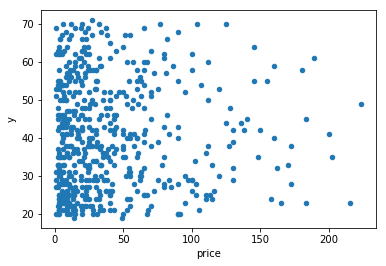

In [167]:
#df_buy.join(df_user, how = 'inner')
import datetime
df_c = pd.merge(df_buy, df_user, how='inner', on='userId')
df_c.dob = pd.to_datetime(df_c.dob)
now = datetime.datetime.now().strftime("%Y-%m-%d")
df_c['c_time'] = pd.to_datetime(now)
df_c['y'] = round((df_c.c_time - df_c.dob)/np.timedelta64(1, 'Y'),0)
df_c = df_c[['userId', 'price', 'y']]
df_c.head(5)
df_c = df_c.groupby('userId').agg({'price': np.sum, 'y': np.max})
df_c.plot.scatter(x = 'price', y = 'y')

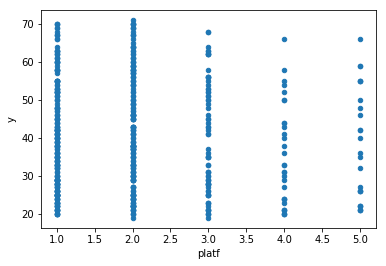

In [129]:
df_p = pd.read_csv('~/shared/user-session.csv')
df_new = pd.merge(df_p, df_c, how='inner', on='userId')
df_new.head(5)
df_new.groupby('userId').agg({'platf': np.max, 'y': np.max}).plot.scatter(x = 'platf', y = 'y')

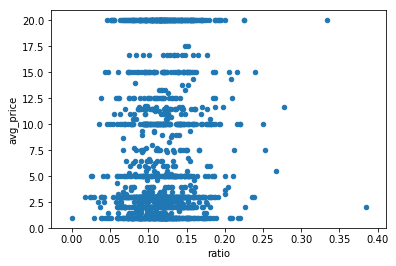

In [147]:
df_comb = pd.read_csv('~/shared/combined-data.csv')

df_comb = df_comb[np.isfinite(df_comb['avg_price'])]
df_comb.groupby('userId').agg({'avg_price': np.sum, 'count_hits': np.sum,'count_gameclicks': np.sum })
df_comb['ratio'] = df_comb.count_hits / df_comb.count_gameclicks
df_comb.head(10)
df_comb.plot.scatter(x = 'ratio', y = 'avg_price')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc0b7aa9518>]], dtype=object)

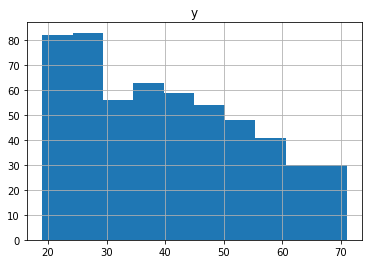

In [152]:
df_c.groupby('userId').agg({'y': np.max}).hist()

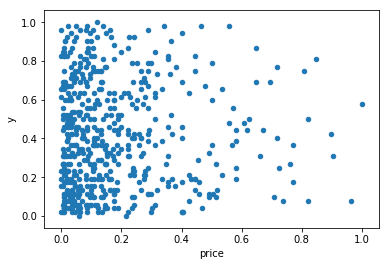

In [156]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_c[['price', 'y']] = scaler.fit_transform(df_c[['price', 'y']])
df_c.plot.scatter(x = 'price', y = 'y')

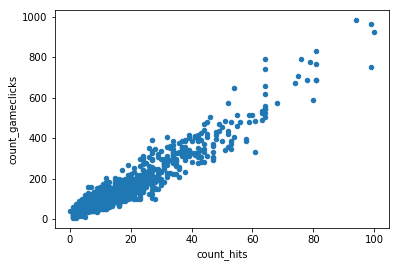

In [159]:
df_comb2 = pd.read_csv('~/shared/combined-data.csv')
df_comb = df_comb[np.isfinite(df_comb['avg_price'])]
df_comb.groupby('userId').agg({'count_hits': np.sum,'count_gameclicks': np.sum })
df_comb.plot.scatter(x = 'count_hits', y = 'count_gameclicks')

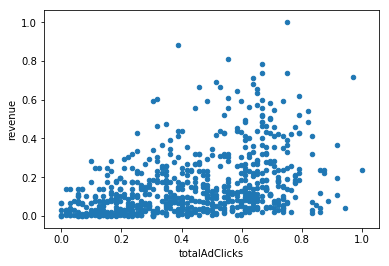

In [165]:
df_cheat  = pd.read_csv('~/shared/w3_clustering.csv')
df_cheat.head(5)
df_cheat[['totalAdClicks', 'revenue']] = scaler.fit_transform(df_cheat[['totalAdClicks', 'revenue']])
df_cheat.plot.scatter(x='totalAdClicks', y='revenue')

In [183]:
from sklearn.cluster import KMeans
from scipy import stats
df_c.price = pd.to_numeric(df_c.price, downcast='integer')
df_c.y = pd.to_numeric(df_c.y, downcast='integer')


In [201]:
f1 = df_c['price']
f2 = df_c['y']

clmns = ['price', 'y']
df_c_std = stats.zscore(df_c[clmns])

kmeans = KMeans(n_clusters=4, random_state=0).fit(df_c_std)
labels = kmeans.labels_

In [202]:
df_c['clusters'] = labels
df_c.head(10)
clmns.extend(['clusters'])
df_c.head(10)
df_c.groupby('clusters').mean()

,price,y
clusters,,
0,17.283262,30.124464
1,74.382716,31.111111
2,28.234375,55.817708
3,148.350000,44.075000


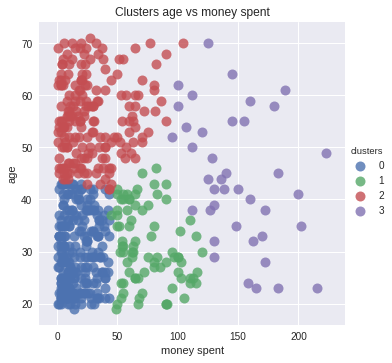

In [205]:
import seaborn as sns

sns.lmplot('price', 'y', 
           data=df_c, 
           fit_reg=False, 
           hue="clusters",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('Clusters age vs money spent')
plt.xlabel('money spent')
plt.ylabel('age')

In [207]:
centroids = kmeans.cluster_centers_
print(centroids)

[[-0.53320339 -0.71700937]
 [ 0.85550497 -0.64767589]
 [-0.2668628   1.08850075]
 [ 2.65445362  0.2633197 ]]
